# Blackbird Dataset
## Description
Initial investigation into [MIT's Blackbird Dataset](http://blackbird-dataset.mit.edu/BlackbirdDatasetData/dice/yawForward/maxSpeed1p0/csv/?prefix=BlackbirdDatasetData/) which involves a quadcopter flying in a flight cage. This dataset has both a [paper](https://arxiv.org/abs/1810.01987) and [Github](https://github.com/mit-fast/Blackbird-Dataset) associated with it.

## Data Exploration

Using the Pandas library, a singular flight data set will be downloaded into a pandas dataframe using a url. Due to the size of the datasets, csv files will be looked at individually. Ordering is:

1. State - Vicon system
        * Global position
        * Euler angles (I think but it could also be quaternians)
2. IMU - Xsens MTi-3 IMU

In [1]:
import pandas as pd
import io
import requests

urlhead = "http://blackbird-dataset.mit.edu/BlackbirdDatasetData/" + \
          "figure8/" + \
          "yawConstant/" +\
          "maxSpeed0p5/csv/"

url = urlhead + "blackbird_slash_state.csv"
contents = requests.get(url).content
pos_and_orien = pd.read_csv(io.StringIO(contents.decode('utf-8')))
pos_and_orien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77287 entries, 0 to 77286
Data columns (total 17 columns):
rosbagTimestamp    77287 non-null int64
header             0 non-null float64
seq                77287 non-null int64
stamp              0 non-null float64
secs               77287 non-null int64
nsecs              77287 non-null int64
frame_id           77287 non-null object
pose               0 non-null float64
position           0 non-null float64
x                  77287 non-null float64
y                  77287 non-null float64
z                  77287 non-null float64
orientation        0 non-null float64
x.1                77287 non-null float64
y.1                77287 non-null float64
z.1                77287 non-null float64
w                  77287 non-null float64
dtypes: float64(12), int64(4), object(1)
memory usage: 10.0+ MB


In [2]:
#Adjustments
#Adjust timescale
pos_and_orien['secs'] = pos_and_orien['secs'] - pos_and_orien.at[1,'secs']
pos_and_orien['nsecs'] = pos_and_orien['nsecs'] - pos_and_orien.at[1,'nsecs']

# Drop empty columns
pos_and_orien = pos_and_orien.drop(['header',\
                                    'stamp',\
                                    'pose',\
                                    'position',\
                                    'orientation'],\
                                    axis=1)
#Rename variables and add units
pos_and_orien = pos_and_orien.rename(columns={"x" : "px_[m]",\
                                              "y" : "py_[m]",\
                                              "z" : "pz_[m]",\
                                              "x.1" : "roll_[rad]",\
                                              "y.1" : "pitch_[rad]",\
                                              "z.1" : "yaw_[rad]"})

pos_and_orien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77287 entries, 0 to 77286
Data columns (total 12 columns):
rosbagTimestamp    77287 non-null int64
seq                77287 non-null int64
secs               77287 non-null int64
nsecs              77287 non-null int64
frame_id           77287 non-null object
px_[m]             77287 non-null float64
py_[m]             77287 non-null float64
pz_[m]             77287 non-null float64
roll_[rad]         77287 non-null float64
pitch_[rad]        77287 non-null float64
yaw_[rad]          77287 non-null float64
w                  77287 non-null float64
dtypes: float64(7), int64(4), object(1)
memory usage: 7.1+ MB


<IPython.core.display.Javascript object>


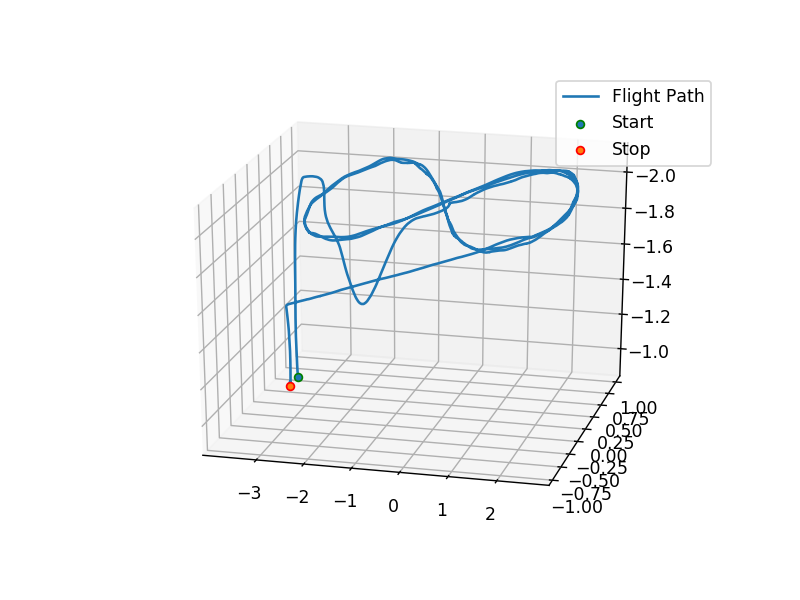

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.invert_zaxis()

Npao = pos_and_orien.index[-1]

ax.plot(pos_and_orien['px_[m]'],\
        pos_and_orien['py_[m]'],\
        pos_and_orien['pz_[m]'],\
        label="Flight Path")
ax.scatter(pos_and_orien.at[1,'px_[m]'],\
           pos_and_orien.at[1,'py_[m]'],\
           pos_and_orien.at[1,'pz_[m]'],\
           marker="o", edgecolor = "g", label="Start")
ax.scatter(pos_and_orien.at[Npao,'px_[m]'],\
           pos_and_orien.at[Npao,'py_[m]'],\
           pos_and_orien.at[Npao,'pz_[m]'],\
           marker="o", edgecolor = "r", label="Stop")
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


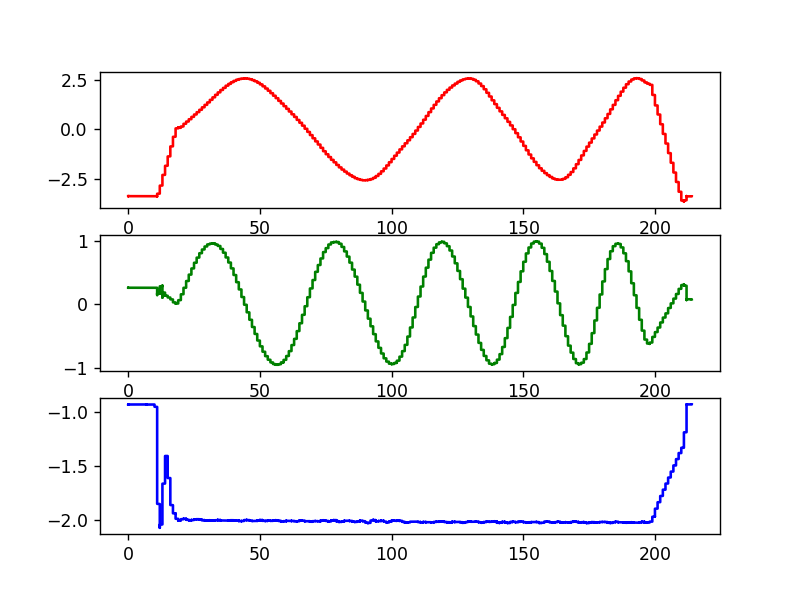

In [4]:
fig,ax = plt.subplots(3,1)


ax[0].plot(pos_and_orien['secs'], pos_and_orien['px_[m]'], color='r')
ax[1].plot(pos_and_orien['secs'], pos_and_orien['py_[m]'], color='g')
ax[2].plot(pos_and_orien['secs'], pos_and_orien['pz_[m]'], color='b')

plt.show()

<IPython.core.display.Javascript object>


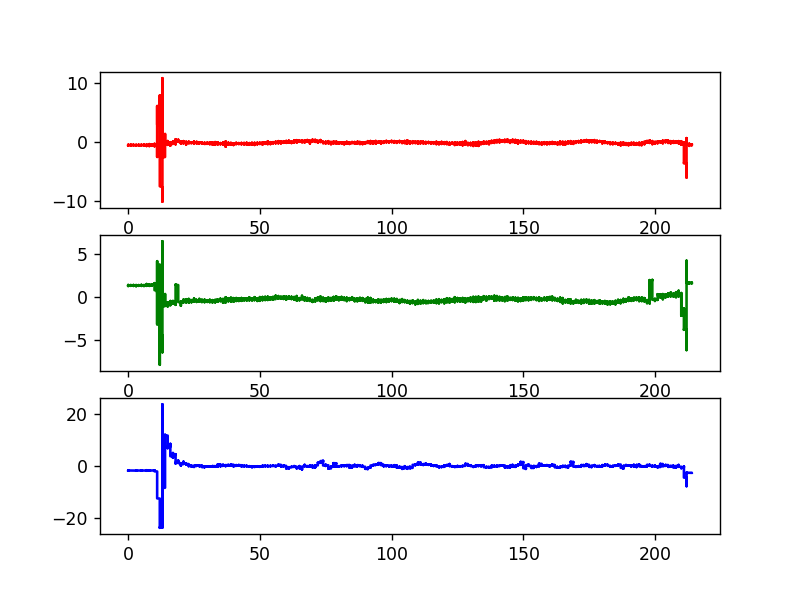

<function matplotlib.pyplot.show(*args, **kw)>

In [9]:
import math

fig,ax = plt.subplots(3,1)

ax[0].plot(pos_and_orien['secs'], pos_and_orien['roll_[rad]'].apply(math.degrees), color='r')
ax[1].plot(pos_and_orien['secs'], pos_and_orien['pitch_[rad]'].apply(math.degrees), color='g')
ax[2].plot(pos_and_orien['secs'], pos_and_orien['yaw_[rad]'].apply(math.degrees), color='b')

plt.show

In [11]:
pos_and_orien['|deltax|'] = pos_and_orien['px_[m]'].diff().apply(math.fabs)
pos_and_orien['|deltay|'] = pos_and_orien['py_[m]'].diff().apply(math.fabs)
pos_and_orien['|deltaz|'] = pos_and_orien['pz_[m]'].diff().apply(math.fabs)

<IPython.core.display.Javascript object>


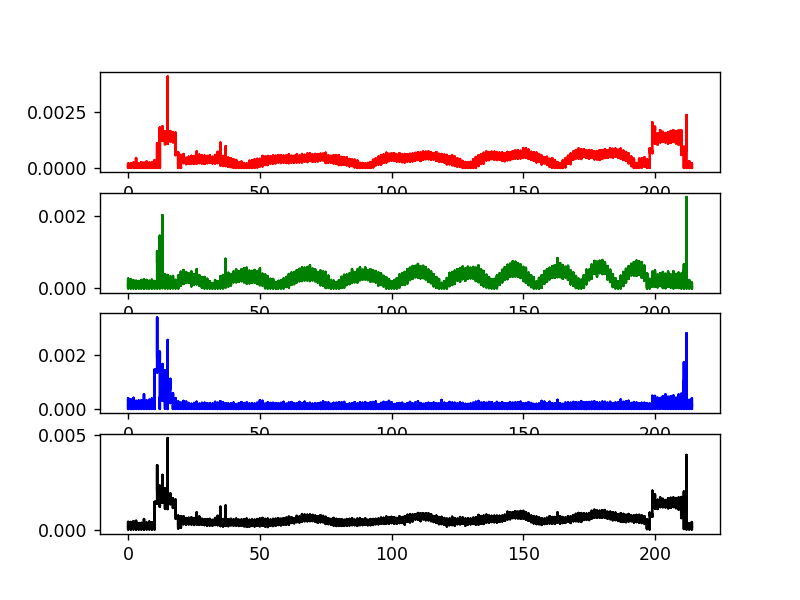

In [18]:
import numpy as np

fig,ax = plt.subplots(4,1)

ax[0].plot(pos_and_orien['secs'], pos_and_orien['|deltax|'], color='r')
ax[1].plot(pos_and_orien['secs'], pos_and_orien['|deltay|'], color='g')
ax[2].plot(pos_and_orien['secs'], pos_and_orien['|deltaz|'], color='b')
ax[3].plot(pos_and_orien['secs'], (pos_and_orien['|deltax|'].apply(np.square) +\
                                   pos_and_orien['|deltay|'].apply(np.square) +\
                                   pos_and_orien['|deltaz|'].apply(np.square)).apply(np.sqrt),\
           color='k')

plt.show()